# Anwendungsbereich 2 
**Aufgabenstellung 1**

##  Einleitung:

Die EDGAR-Gitterkarten zu Treibhausgasemissionen bieten zuverlässige Informationen zur Unterstützung der Entwicklung regionaler Klimapolitiken. Sie verwenden kontinuierlich aktualisierte und verbesserte räumliche Proxys zur Herabskalierung nationaler Emissionen auf eine globale Gitterkarte. Diese regionalen NUTS2-Treibhausgasemissionen werden im europäischen Bereich von der GD REGIO in den EU-Kohäsionsberichten (2022) genutzt und unterstützen den Jahreszyklus des EU-Semesters.

[Quelle: European Commission, Joint Research Centre](http://edgar.jrc.ec.europa.eu/overview.php?v=42FT2012)





**Aufgaben:**
1. Im Jupyter Notebook hat man die Möglichkeit, bestehende Datensätze einlesen zu lassen. Importieren Sie den Datensatz der [CO2-Emissionen](EDGAR_GHG_AR4_NUTS2_by_country_1990_2021.xls) und zeigen Sie die ersten fünf Zeilen an. 
Welche Schritte zur Datenaufbereitung mussten Sie durchführen, um Ihr Datenset analysierbar zu machen?
Hinweis: Denken Sie an die Struktur der Excel-Datei und welche Teile davon für die Analyse wichtig sind.

2. In der Regel muss man das Datenset vorher bereinigen und nur sinvolle Features in Beatracht ziehen. Überlegen Sie, wie Sie die ersten Zeilen überspringen und den Index entsprechend anpassen können und wie die Spaltennamen festgelegt und welche Zeilen entfernt werden sollten.
Hinweis: Wir möchten uns nur die Daten für DE ansehen.z.B anhand eines bestimmten Kriteriums (z.B. Städtenamen) die Daten filtern.

3. Denken Sie darüber nach, wie die Datenstruktur verändert werden kann, um eine zeilenweise Analyse zu ermöglichen. Überlegen Sie, wie die Summe der Emissionen berechnet und in den bestehenden DataFrame integriert werden kann.
Hinweis: (wie könnte man einen DataFrame transponieren?)

4. Plotten Sie die Emissionen einzelner Städte und die Gesamtemissionen?

   
5. Führen Sie eine Regressionsanalyse durch. Berechnen Sie die Regressionslinie und plotten d sie im einem Plot mit den CO2-Daten. Wie könne Sie die Genauigkeit der linearen Regression beurteilen. z.B ([R2 und MAE](Theorie.ipynb))
  




1. **Problemstellung:** 
Wie können die CO2-Emissionen einzelner Städte in Deutschland über die Jahre analysiert und visualisiert werden, und wie lässt sich eine lineare Regression zur Vorhersage der Emissionstrends durchführen?
2. **Lösungssatz:**
   - Einlesen der Daten: Laden der Excel-Datei, die CO2-Emissionsdaten für verschiedene Städte in Deutschland enthält.
   - Datenaufbereitung: Filterung und Bereinigung der Daten, um nur relevante Informationen für spezifische Städte und Zeiträume zu behalten.
   - Analyse einzelner Städte: Darstellung der Emissionen für Städte wie Freiburg, Hamburg und Berlin über die Jahre hinweg.
   - Berechnung der Gesamtemissionen: Summierung der Emissionen aller Städte und Darstellung dieser Summen.
   - Lineare Regression: Durchführung einer Regressionsanalyse, um Trends in den Emissionen zu identifizieren und vorherzusagen.
   - Visualisierung: Erstellen von Diagrammen zur anschaulichen Darstellung der Emissionen und der Regressionslinie.


3. **Voraussetzungen:**
Grundkenntnisse in Python, Erfahrung mit pandas und numpy für Datenmanipulation, scipy für statistische Analysen (lineare Regression) und matplotlib für Datenvisualisierung.

**Aufgabenbearbeitung:**

1. **Anforderungen:**
   Analysieren und visualisieren Sie die CO2-Emissionen verschiedener deutscher Städte über mehrere Jahre. Führen Sie eine lineare Regression durch, um Emissionstrends zu identifizieren und vorherzusagen.
   -  Benötigte Bibliotheken: Pandas für die Datenmanipulation, Matplotlib für die Visualisierung, und Scipy sowie Scikit-Learn für die lineare Regression und die Berechnung von Genauigkeitsmetriken.

2. **Modellbildung:**
    Erstellen Sie ein Modell, das die jährlichen CO2-Emissionen der Städte vorhersagen kann.
    
3. **Algorithmierung/Entwurf:**
   - Datenbereinigung:
Entfernen irrelevanter Spalten (NUTS_ID, CNTR_CODE, NAME_LATN).
Filtern der Daten nach Ländern und Städten.
   - Berechnung der Emissionen:
Summieren der Emissionen aller Städte.
    - Plotten der Emissionen:
Erstellung von Diagrammen für einzelne Städte und die Gesamtemissionen.
    - Lineare Regression:
Durchführung der Regression zur Vorhersage von Emissionstrends.

   


5. **Implementierung:**
   - Verwendete Bibliotheken: pandas für die Datenmanipulation, scipy für die statistische Analyse, matplotlib für die Datenvisualisierung.
   - Schritte :
        - Daten einlesen und vorbereiten
        - Filtern und Bereinigen der Daten
        - Berechnung der Gesamtemissionen
        - Visualisierung der Daten
        - Lineare Regression
        - Modellbewertung: Bewerten Sie die Leistung des Modells anhand geeigneter Metriken wie z.b [R2 und MAE](Theorie.ipynb)
6. **Anwendung und Test:**
    - Visualisierung: Erstellen Sie Diagramme, um die Leistung des Modells zu zeigen, z.B. vorhergesagte vs. tatsächliche Werte.
    - Berechnung von Genauigkeitsmetriken:

        
   

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Laden der CSV-Datei mit Angabe des Trennzeichens
file_path = 'EDGAR_GHG_AR4_NUTS2_by_country_1990_2021.xlsx'
df = pd.read_excel(file_path)
df.head(25)
#df.info()
#df.describe()


,Data source: Emissions Database for Global Atmospheric Research (EDGAR),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,"Data release: EDGARv7.0_FT2021, https://edgar....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Emissions of total greenhouse gases (GHG) incl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Emissions are reported for the European domain...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Emissions from international shipping and avia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Emissions over seas (i.e. domestic shipping, d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NUTS_ID,CNTR_CODE,NAME_LATN,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
8,AT11,AT,Burgenland,2068.167336,2196.740723,2134.660443,2127.356098,2091.145599,2134.251105,2248.750789,...,2201.048493,2276.940505,2220.533417,2248.330293,2306.613263,2332.951869,2319.415704,2329.860375,2122.919720,2170.567266
9,AT12,AT,Niederösterreich,16345.822775,17342.267247,16815.898836,17504.277794,17329.615392,17375.573424,18529.353897,...,16753.458226,16879.555498,16330.783420,16731.928287,17059.129729,17530.397463,17098.642850,17503.400150,16099.620286,16542.109352


In [10]:
# Daten ab Zeile 9 (index 8) übernehmen und dann index wieder auf Null setzen
df2= df.iloc[7:].reset_index(drop=True)

# Spaltennamen aus Zeile 0 (vorher Zeile 9, index 8) übernehmen
df2.columns= df2.iloc[0]

# Zeile 0 entfernen
df2 = df2.drop(0)


df2


,NUTS_ID,CNTR_CODE,NAME_LATN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,AT11,AT,Burgenland,2068.167336,2196.740723,2134.660443,2127.356098,2091.145599,2134.251105,2248.750789,...,2201.048493,2276.940505,2220.533417,2248.330293,2306.613263,2332.951869,2319.415704,2329.860375,2122.919720,2170.567266
2,AT12,AT,Niederösterreich,16345.822775,17342.267247,16815.898836,17504.277794,17329.615392,17375.573424,18529.353897,...,16753.458226,16879.555498,16330.783420,16731.928287,17059.129729,17530.397463,17098.642850,17503.400150,16099.620286,16542.109352
3,AT13,AT,Wien,7014.976859,7284.751913,6909.504332,7275.017356,7313.070536,7556.386884,8274.372403,...,7801.310710,7334.995146,6942.664118,7222.068859,7215.483402,7707.321625,7400.097655,7937.894196,7455.011224,7755.672288
4,AT21,AT,Kärnten,4865.489472,5211.204512,5114.409939,5200.585580,5185.678550,5324.720913,5477.799529,...,5542.636631,5771.376657,5626.678742,5744.696341,5897.479804,5958.323353,5842.212562,5858.095443,5386.033177,5520.176550
5,AT22,AT,Steiermark,19007.532446,20213.357443,17783.569207,17078.920886,17684.774038,19131.135415,19723.093147,...,17376.443191,17676.740774,16401.920277,16476.023397,16083.135293,16150.083622,15657.504357,15670.523184,14334.339223,14863.850313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,NL,NL,816.513,864.356000,829.271000,829.271000,835.650000,730.397000,762.292000,720.828000,...,1103.570000,960.041000,1049.350000,972.799000,939.899000,935.271000,857.589000,783.891000,785.614000,NaN
308,PL,PL,270.14,192.817000,158.854000,65.688100,25.453400,56.253300,53.316200,47.842600,...,9.568510,9.568510,6.379010,6.379010,14.563200,6.292910,5.836940,5.527680,5.926910,NaN
309,PT,PT,137.149,133.959000,127.580000,149.907000,159.475000,146.717000,146.717000,140.338000,...,386.813000,270.995000,306.214000,349.426000,309.146000,322.188000,277.700000,226.242000,232.780000,NaN
310,RO,RO,1022.48,1247.610000,1114.670000,423.070000,409.748000,328.325000,475.850000,1085.400000,...,130.263000,117.555000,136.617000,127.086000,126.619000,126.489000,136.637000,128.265000,139.592000,NaN


In [11]:
# Löschung von Spalten

df2_filtered= df2.drop(("NUTS_ID"), axis=1)
df2_filtered


,CNTR_CODE,NAME_LATN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,AT,Burgenland,2068.167336,2196.740723,2134.660443,2127.356098,2091.145599,2134.251105,2248.750789,2158.540266,...,2201.048493,2276.940505,2220.533417,2248.330293,2306.613263,2332.951869,2319.415704,2329.860375,2122.919720,2170.567266
2,AT,Niederösterreich,16345.822775,17342.267247,16815.898836,17504.277794,17329.615392,17375.573424,18529.353897,18153.341546,...,16753.458226,16879.555498,16330.783420,16731.928287,17059.129729,17530.397463,17098.642850,17503.400150,16099.620286,16542.109352
3,AT,Wien,7014.976859,7284.751913,6909.504332,7275.017356,7313.070536,7556.386884,8274.372403,7938.047951,...,7801.310710,7334.995146,6942.664118,7222.068859,7215.483402,7707.321625,7400.097655,7937.894196,7455.011224,7755.672288
4,AT,Kärnten,4865.489472,5211.204512,5114.409939,5200.585580,5185.678550,5324.720913,5477.799529,5506.589578,...,5542.636631,5771.376657,5626.678742,5744.696341,5897.479804,5958.323353,5842.212562,5858.095443,5386.033177,5520.176550
5,AT,Steiermark,19007.532446,20213.357443,17783.569207,17078.920886,17684.774038,19131.135415,19723.093147,20014.116420,...,17376.443191,17676.740774,16401.920277,16476.023397,16083.135293,16150.083622,15657.504357,15670.523184,14334.339223,14863.850313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,NL,816.513,864.356000,829.271000,829.271000,835.650000,730.397000,762.292000,720.828000,714.449000,...,1103.570000,960.041000,1049.350000,972.799000,939.899000,935.271000,857.589000,783.891000,785.614000,NaN
308,PL,270.14,192.817000,158.854000,65.688100,25.453400,56.253300,53.316200,47.842600,28.705500,...,9.568510,9.568510,6.379010,6.379010,14.563200,6.292910,5.836940,5.527680,5.926910,NaN
309,PT,137.149,133.959000,127.580000,149.907000,159.475000,146.717000,146.717000,140.338000,146.717000,...,386.813000,270.995000,306.214000,349.426000,309.146000,322.188000,277.700000,226.242000,232.780000,NaN
310,RO,1022.48,1247.610000,1114.670000,423.070000,409.748000,328.325000,475.850000,1085.400000,697.856000,...,130.263000,117.555000,136.617000,127.086000,126.619000,126.489000,136.637000,128.265000,139.592000,NaN


In [12]:
# Nur Zeilen wo DE vorkommt, übernhemen 
filtered_df = df2[df2['CNTR_CODE'] == 'DE']
filtered_df=filtered_df.reset_index(drop=True)
filtered_df

#filtered_df = filtered_df[filtered_df['NAME_LATN'] == 'Freiburg']
#filtered_df






,NUTS_ID,CNTR_CODE,NAME_LATN,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,DE11,DE,Stuttgart,44483.249292,44055.267183,42124.225600,41922.912094,41565.225785,41699.607123,44011.394773,...,30553.054732,31462.953858,29923.016574,30156.015816,30102.354401,29436.104013,28467.281858,26641.921220,24296.417655,25341.831316
1,DE12,DE,Karlsruhe,42277.787691,41171.467877,41018.770924,39499.792473,40026.055323,38563.952490,40135.974462,...,25996.167600,26428.813931,25252.821851,25898.170264,25954.469226,25762.153645,24377.192511,23275.886539,21529.564961,22252.330499
2,DE13,DE,Freiburg,17992.825627,17951.971557,16851.764318,16853.982861,16406.677819,16458.319899,16965.598333,...,12451.633382,12810.451594,12288.574454,12552.354736,12823.585849,12864.550043,12603.584096,12596.538967,11783.727596,11970.941547
3,DE14,DE,Tübingen,15515.975579,15498.866573,14586.734001,14614.101815,14231.774627,14223.071575,14686.635329,...,11337.154709,11661.574542,11284.043674,11524.822843,11691.849872,11697.277395,11458.456077,11378.924515,10637.393741,10793.569210
4,DE21,DE,Oberbayern,45457.455704,44958.159191,42534.905091,42509.524715,42278.969774,42189.303952,44869.295261,...,37474.874018,37924.731695,35876.066363,35811.843038,36873.031362,36666.165855,35525.741940,34951.388381,32624.931164,33411.941139
5,DE22,DE,Niederbayern,11640.499267,11469.213860,10823.479519,10817.955280,10578.256238,10577.941457,10882.893953,...,9765.301700,9976.747798,9751.697525,9949.553356,10193.774784,10220.040578,9980.753461,9949.837404,9263.255724,9396.394226
6,DE23,DE,Oberpfalz,11797.374162,11553.006275,10957.584664,10964.117792,10799.541197,10816.089316,11077.113353,...,8902.573377,9111.531868,8942.036673,9043.310809,9109.375313,9159.867416,9034.105358,8999.705594,8420.696024,8499.684250
7,DE24,DE,Oberfranken,9669.028031,9638.066938,9117.192394,9182.257496,8949.858822,8944.013552,9159.034067,...,7126.804163,7333.332065,7142.270335,7239.585302,7331.212884,7359.923035,7229.773016,7252.202637,6792.416977,6820.547786
8,DE25,DE,Mittelfranken,13858.398685,13834.452245,12945.855263,12968.423775,12740.873058,12711.359727,13395.333828,...,10481.710027,10731.599264,10297.275293,10372.929736,10598.379766,10638.466940,10378.425053,10418.822287,9814.310267,9910.508161
9,DE26,DE,Unterfranken,12550.557910,12445.921426,11795.787048,11863.651001,11728.521850,11766.067392,12168.348617,...,9987.925874,10196.404190,9854.343469,9898.998958,10104.865512,10142.286453,9929.162276,9907.121387,9269.161870,9414.157951


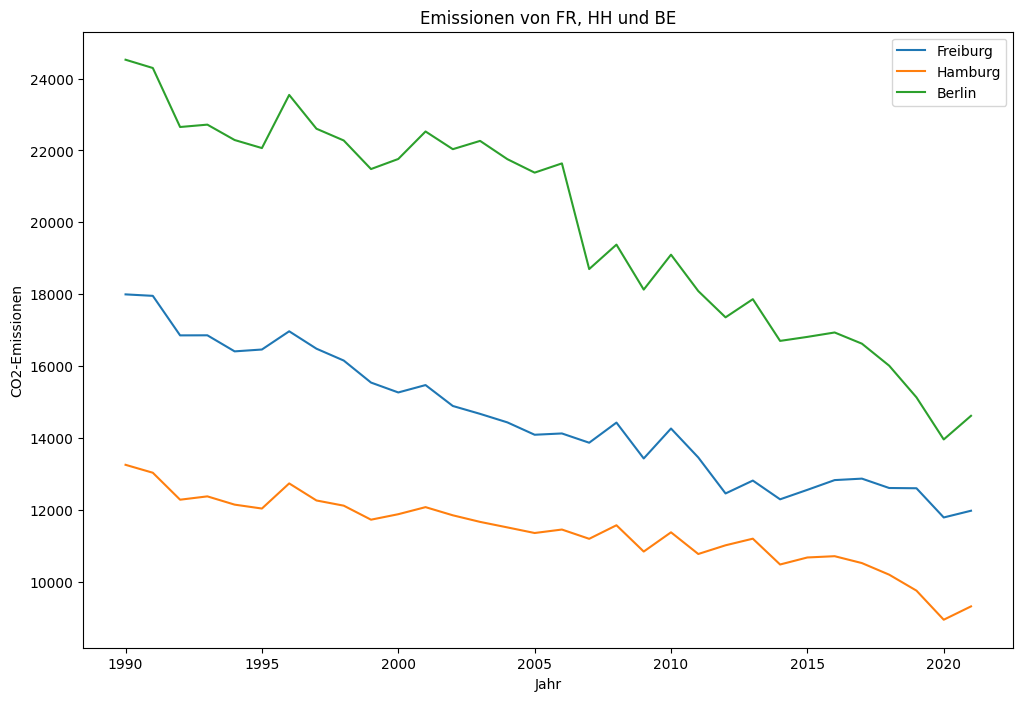

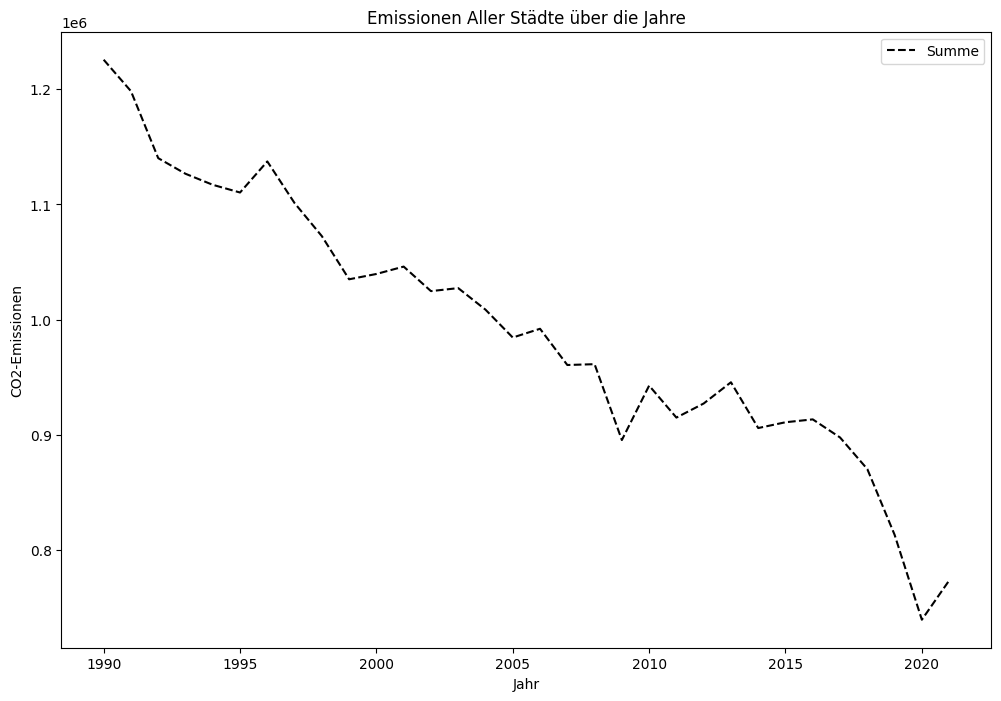

In [14]:
# Emissionen einzelner bzw. aller Städte über die Jahre plotten.(Andere Methode)
X = filtered_df.drop(columns=['NUTS_ID','CNTR_CODE','NAME_LATN'])

y = filtered_df[filtered_df["NAME_LATN"] == "Freiburg"]
y2 = filtered_df[filtered_df["NAME_LATN"] == "Hamburg"]
y3 = filtered_df[filtered_df["NAME_LATN"] == "Berlin"]
# filtered_df Tranponiert 
X = X.T
X
# Summe jeder Spalte und dann als neue Zeile appenden
summe_spalte = X.sum(axis=1)
X['Summe'] = summe_spalte

# Plot the emissions data for each city
plt.figure(figsize=(12, 8))

# Plot Freiburg
plt.plot(y.drop(columns=['NUTS_ID','CNTR_CODE','NAME_LATN']).T, label='Freiburg')

# Plot Hamburg
plt.plot(y2.drop(columns=['NUTS_ID','CNTR_CODE','NAME_LATN']).T, label='Hamburg')

# Plot Berlin
plt.plot(y3.drop(columns=['NUTS_ID','CNTR_CODE','NAME_LATN']).T, label='Berlin')

# Add title and labels
plt.title('Emissionen von FR, HH und BE')
plt.xlabel('Jahr')
plt.ylabel('CO2-Emissionen')
plt.legend()


# Plot für alle Städte
plt.figure(figsize=(12, 8))


plt.plot(X.Summe, label='Summe', linestyle='--', color='black')


# legende
plt.legend()

# Add title and labels
plt.title('Emissionen Aller Städte über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('CO2-Emissionen')

# plotten
plt.show()


In [ ]:
#x.plot.line(y=[0, 1, 2], use_index=True)#legnede anpasssen !!  !
#plt.legend (["Stuttgart ","Karlsruhe", "Freiburg"])
#plt.show()

In [7]:
X # header wird noch angepasst, sodass stadt Nummern Städtennamen stehen !! 

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Summe
0,,,,,,,,,,,,,,,,,,,,,
1990.0,44483.249292,42277.787691,17992.825627,15515.975579,45457.455704,11640.499267,11797.374162,9669.028031,13858.398685,12550.557910,...,35342.776337,33692.059427,15089.872396,12102.994636,49227.110626,32097.093964,29481.209576,2810.03,2089.130,1.225568e+06
1991.0,44055.267183,41171.467877,17951.971557,15498.866573,44958.159191,11469.213860,11553.006275,9638.066938,13834.452245,12445.921426,...,34555.473716,33012.348611,14918.667435,12719.670896,48036.788886,31693.949591,29184.680514,2452.69,2229.460,1.198300e+06
1992.0,42124.225600,41018.770924,16851.764318,14586.734001,42534.905091,10823.479519,10957.584664,9117.192394,12945.855263,11795.787048,...,32819.877156,31546.734988,14130.527668,12117.280038,46098.033754,30045.111074,27590.000552,2462.76,2261.360,1.140173e+06
1993.0,41922.912094,39499.792473,16853.982861,14614.101815,42509.524715,10817.955280,10964.117792,9182.257496,12968.423775,11863.651001,...,32047.330823,31209.044953,14126.606671,11685.323489,45790.924229,30074.739487,27526.911308,2303.96,2213.520,1.126628e+06
1994.0,41565.225785,40026.055323,16406.677819,14231.774627,42278.969774,10578.256238,10799.541197,8949.858822,12740.873058,11728.521850,...,31723.633844,30871.114970,13962.667778,11331.280463,45437.834129,29544.471308,26973.362993,2303.95,1747.850,1.117047e+06
1995.0,41699.607123,38563.952490,16458.319899,14223.071575,42189.303952,10577.941457,10816.089316,8944.013552,12711.359727,11766.067392,...,31519.167884,30488.028630,14120.264258,11038.723429,45618.819194,29432.679035,27116.163018,2322.53,1607.510,1.110364e+06
1996.0,44011.394773,40135.974462,16965.598333,14686.635329,44869.295261,10882.893953,11077.113353,9159.034067,13395.333828,12168.348617,...,31312.742914,31604.391080,14147.557228,11192.707250,45390.349859,30645.603275,26368.942732,2545.81,1269.420,1.137334e+06
1997.0,42851.016552,37883.624433,16481.051025,14307.879069,43638.887511,10694.589287,10907.445583,8974.841027,13060.550239,11930.915862,...,30185.920104,30452.219504,13889.653749,10526.409811,44130.481366,29874.856350,25712.792163,2551.99,1164.170,1.101184e+06
1998.0,42076.817686,27757.799883,16151.384687,14055.848651,43326.540733,10568.741898,10844.420310,8882.653179,12913.547009,11852.533533,...,29935.384435,30346.716408,13587.685577,10103.974934,43199.647452,29524.206741,25284.482629,2620.21,950.472,1.072509e+06


# Linear Regression

In [16]:
from scipy.stats import linregress

 Das sind die Werte :
 slope:-12151.15250950433, intercept:1180912.1014872475, r_value:-0.969153749505607, p_value:8.408622110277826e-20, std_err:564.1637377543344, in Reihenfolge 


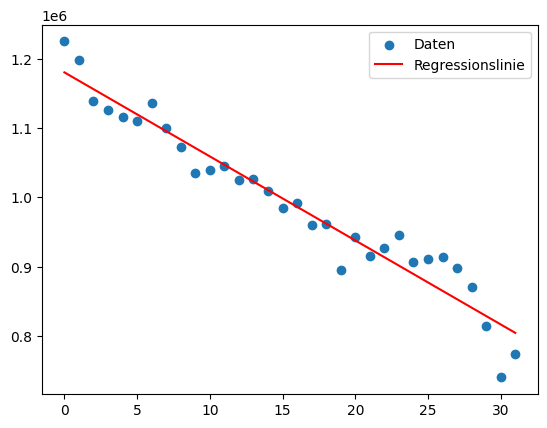

In [15]:
x = np.arange(len(X))
y = X["Summe"]


# Durchführung der linearen Regression # 
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Regressionslinie berechnen
X['Regressionslinie'] = intercept + slope * x 
y_dach=X['Regressionslinie']

# slope, intercept, r_value, p_value, std_err anzigen
# print(X)
print (f' Das sind die Werte :\n slope:{slope}, intercept:{intercept}, r_value:{r_value}, p_value:{p_value}, std_err:{std_err}, in Reihenfolge ')


#Plotten der Daten und der Regressionslinie

plt.scatter(x,y, label='Daten')
plt.plot(x,y_dach, color='red', label='Regressionslinie')
plt.legend()
plt.show()


In [ ]:
#X anzeigen lassen mit neuer Spalte (Regressions_Linie)
#X

In [16]:
# Genauigkeitsmetriken berechnen
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y, y_dach)
# Bestimmtheitsmaß
r2 = r2_score(y, y_dach) 

print(f'Mittlere absolute Fehler (MAE): {mae}') 
print(f'R^2 Score: {r2}')# Aussagekraft ? 


Mittlere absolute Fehler (MAE): 22247.432715625495
R^2 Score: 0.9392589901807771


# Linear Regression mit Splitting 
- **Train, Validation und Test splits**

# Random Forest Regression

In [ ]:
# Ploynomial regression


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Reshape the 'Hubraum' column to 2D array
X = df_filtered[['Hubraum']]
y = df_filtered['CO₂-Emissionen']

# Random Forest Regression Model

forest_reg_model = RandomForestRegressor( n_estimators=100, random_state=19)
forest_reg_model.fit(X,y)

#Vorhersage 
df_filtered["forest_predictions"] = forest_reg_model.predict(X)

# Model accuracy
forest_mae = mean_absolute_error(df_filtered['CO₂-Emissionen'], df_filtered['forest_predictions'])
forest_r2 = r2_score(df_filtered['CO₂-Emissionen'], df_filtered['forest_predictions'])
forest_mae,forest_r2


(0.0021367918816230513, 0.5157865282049341)

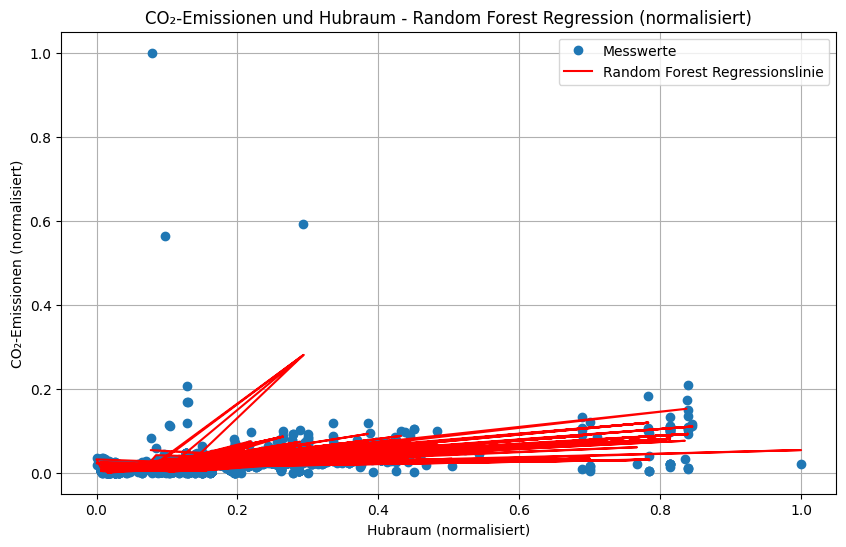

In [78]:
# Daten und Regressionslinie plotten
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Messwerte')
plt.plot(df_filtered['Hubraum'], df_filtered['forest_predictions'], 'r', label='Random Forest Regressionslinie')
plt.xlabel('Hubraum (normalisiert)')
plt.ylabel('CO₂-Emissionen (normalisiert)')
plt.title('CO₂-Emissionen und Hubraum - Random Forest Regression (normalisiert)')
plt.legend()
plt.grid(True)
plt.show()